# Premières mises en formes et visualisations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

# A supprimer après avoir vérifier si pas d'erreurs de compilation car déja dans les autres jupyter

## Première visualisations concernant les prix de vente (valeurs foncières)

### 1 - Valeurs foncières (en euros)

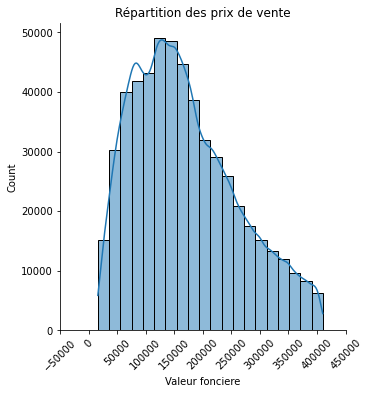

In [16]:
a= sns.displot(x= "Valeur fonciere", data = df_clean,
               bins = 20, kde = True).set(title = 'Répartition des prix de vente')
a.set_xticklabels(rotation=45);

Les prix de vente laissent présager un comportement gaussien. Testons cette hypothèse avec le test d'Agostino.

In [17]:
ag = stat.normaltest(df_clean["Valeur fonciere"]) # message d’avertissement, n est trop faible pour un test fiable
print(ag) 

NormaltestResult(statistic=32147.602763623734, pvalue=0.0)


Le résultat de la p-value ne nous permettent pas de rejetter la normalité.

Qu'en est-il de la répartition suivant le type de biens?

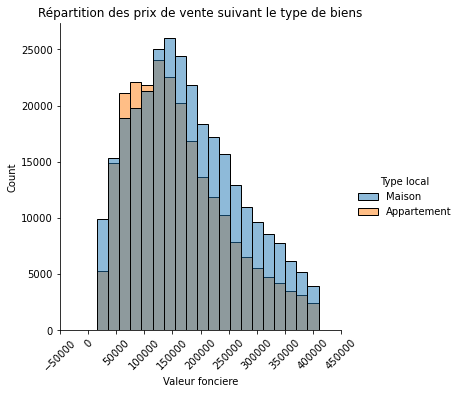

In [18]:
a= sns.displot(x= "Valeur fonciere", data = df_clean, hue = "Type local",
               bins = 20).set(title = 'Répartition des prix de vente suivant le type de biens')
a.set_xticklabels(rotation=45);

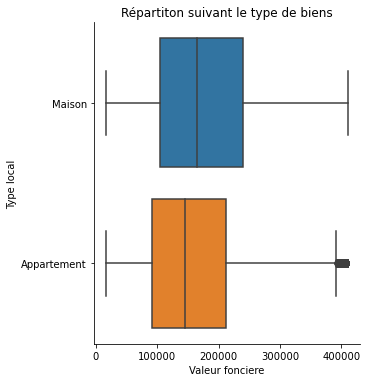

In [19]:
sns.catplot(x="Valeur fonciere", y = "Type local",kind="box",
            data=df_clean).set(title = 'Répartiton suivant le type de biens');

Interprétation : 

- le prix de vente laisse penser à un comportement gaussien dans les deux cas (maison et appartement)
- la moyenne des prix des maisons est plus élevée que pour les appartements
- ainsi qu'une plus grande variablité
- une queue de distribution plus épaisse dans les deux cas à droite

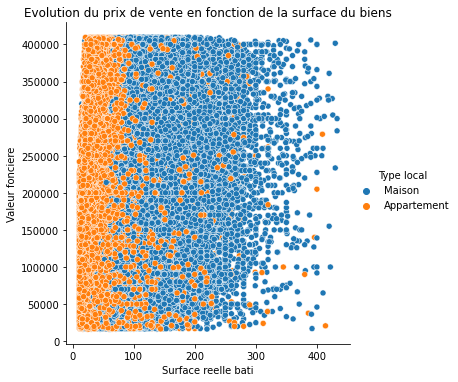

In [20]:
sns.relplot(x="Surface reelle bati", y="Valeur fonciere", 
            hue = 'Type local', data=df_clean).set(title = "Evolution du prix de vente en fonction de la surface du biens");

Interprétation :
- nous ne distinguons pas de tendance générale avec la surface car les données sont trop hétérogènes pour le moment 
- la surface des appartements semblent inférieurs aux surface des maisons graphiquement (plutôt cohérent).
    
    

### 2 - Visualisation du prix au m2

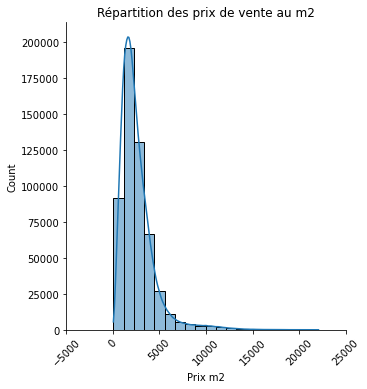

In [21]:
a= sns.displot(x= "Prix m2", data = df_clean,
bins = 20, kde = True).set(title = 'Répartition des prix de vente au m2')
a.set_xticklabels(rotation=45);


In [22]:
ag = stat.normaltest(df_clean["Prix m2"]) # message d’avertissement, n est trop faible pour un test fiable
print(ag) 

NormaltestResult(statistic=304438.13752914174, pvalue=0.0)


Résultat : il semble y avoir un comportement gaussien concernant la distribution de prix au m2

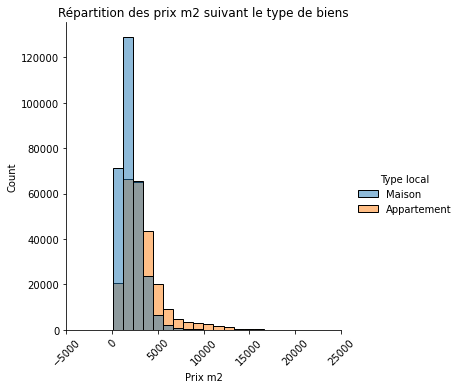

In [23]:
a= sns.displot(x= "Prix m2", data = df_clean, hue = "Type local",
               bins = 20).set(title = 'Répartition des prix m2 suivant le type de biens')
a.set_xticklabels(rotation=45);

### 3 -  Analyse des grandes villes de France

In [24]:
Top_villes = df_clean[(df_clean["Commune2"]=="PARIS"  )  | 
                      (df_clean["Commune2"]=="MARSEILLE" )   |
                      (df_clean["Commune2"]=="LYON"   ) |
                      (df_clean["Commune2"]=="TOULOUSE" )   |
                      (df_clean["Commune2"]=="NICE" )   |
                      (df_clean["Commune2"]=="NANTES")    |
                      (df_clean["Commune2"]=="MONTPELLIER")    |
                      (df_clean["Commune2"]=="STRASBOURG" )   |
                      (df_clean["Commune2"]=="BORDEAUX"   ) |
                      (df_clean["Commune2"]=="LILLE" )   ]
Top_villes_agg = pd.DataFrame(Top_villes.groupby("Commune2").agg(np.mean)["Prix m2"]).sort_values(by = 'Prix m2', ascending = False)
Top_villes_order = Top_villes_agg.index


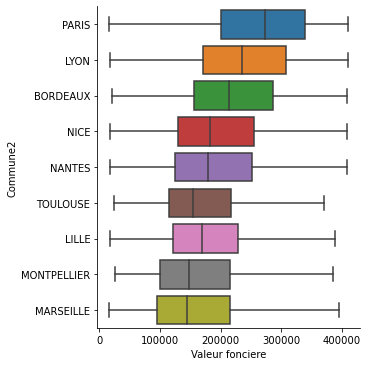

In [25]:
sns.catplot(x="Valeur fonciere", y = "Commune2",kind="box", data=Top_villes,sym='',order = Top_villes_order);

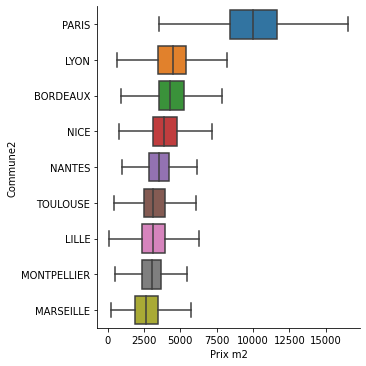

In [26]:
sns.catplot(x="Prix m2", y = "Commune2",kind="box", data=Top_villes, order = Top_villes_order, sym ="");

Sans grande surprise, Paris se distingue des autres villes par un prix m2 plus élevé ainsi qu'une variance plus élevée. Par ordre décroissant, nous avons ensuite Lyon, Bordeaux, Nice, Nantes, Toulouse, Lille, Montpellier et Marseille. 

### 4 - Visualisation de Paris - différente des autres villes françaises

In [27]:
df_clean["Paris"]= df_clean["Commune2"].apply(lambda x : 1 if x == "PARIS" else 0)
print("proportion de ventes à Paris", df_clean['Paris'].value_counts(normalize = True))

paris = df_clean[df_clean.Commune2 == "PARIS"]
paris_agg = pd.DataFrame(paris.groupby("Commune").agg(np.mean)["Prix m2"]).sort_values(by = 'Prix m2', ascending = False)
paris_order = paris_agg.index
print(paris_agg)

proportion de ventes à Paris 0    0.978691
1    0.021309
Name: Paris, dtype: float64
               Prix m2
Commune               
PARIS 06  12457.188381
PARIS 07  11645.432576
PARIS 04  11633.294169
PARIS 01  11430.220068
PARIS 05  11166.855837
PARIS 02  11074.411579
PARIS 03  11055.713314
PARIS 09  10349.054460
PARIS 11  10314.152186
PARIS 15  10090.186782
PARIS 14  10007.263425
PARIS 10   9896.742002
PARIS 17   9892.864111
PARIS 16   9880.312179
PARIS 08   9815.340972
PARIS 12   9549.721281
PARIS 18   9472.811209
PARIS 13   9337.389585
PARIS 20   9106.371102
PARIS 19   8721.393431


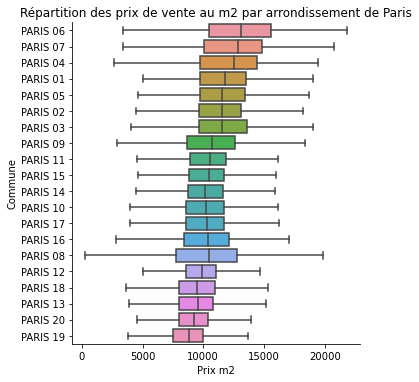

In [28]:
sns.catplot(x="Prix m2", y = "Commune",kind="box", data = paris, order = paris_order,sym='' ).set(title = 'Répartition des prix de vente au m2 par arrondissement de Paris');

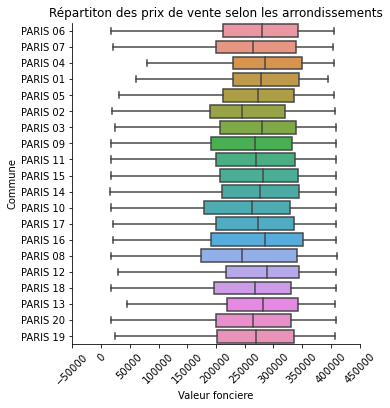

In [29]:
c = sns.catplot(x="Valeur fonciere", y = "Commune",kind="box", 
            data = paris, order = paris_order, sym = "" ).set(title='Répartiton des prix de vente selon les arrondissements')
c.set_xticklabels(rotation=45);

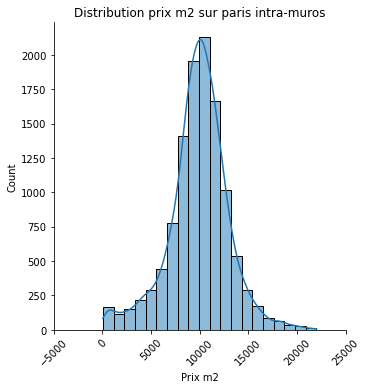

In [30]:
a= sns.displot(x= "Prix m2", data = paris,
bins = 20, kde = True).set(title = 'Distribution prix m2 sur paris intra-muros')
a.set_xticklabels(rotation=45);

### 5 - Analyse des régions et départements français

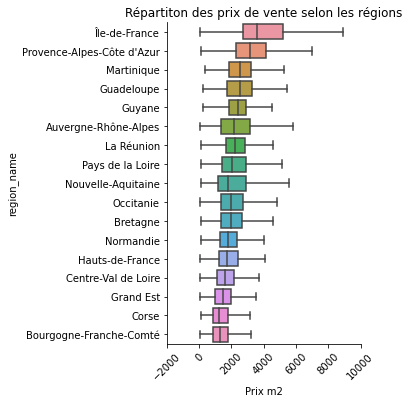

In [31]:
dep_reg = pd.read_csv("departements-region.csv",sep=",")
dep_reg = dep_reg.rename(columns = {"num_dep":"Code departement"})
dico2 = {"Code departement":{"2A":"2","2B":"2"}}
dep_reg = dep_reg.replace(dico2)
dep_reg["Code departement"] = dep_reg["Code departement"].astype('int32')
df_clean = df_clean.replace(dico2)
df_clean["Code departement"] = df_clean["Code departement"].astype('int32')
df_clean = df_clean.merge(right = dep_reg , on = 'Code departement', how = 'left')
regions = pd.DataFrame(df_clean.groupby("region_name").agg(np.mean)["Prix m2"]).sort_values(by = 'Prix m2', ascending = False)
regions_order =  regions.index

c = sns.catplot(x="Prix m2", y = "region_name",kind="box",
data = df_clean, sym="" , order =regions_order).set(title='Répartiton des prix de vente selon les régions')
c.set_xticklabels(rotation=45);

On intègre une base de données qui informe si la commune est en bord de mer ou non

In [32]:
communes_littorales_2019 = pd.read_csv("communes_littorales_2019.csv", sep=";")
df_clean = df_clean.merge(right = communes_littorales_2019 , on = 'Commune', how = 'left')
dummies = pd.get_dummies(df_clean["Classement"])
df_clean = pd.concat([df_clean, dummies],axis =1)


### 5 - Analyse des corrélations

In [33]:
cor = df_clean.corr()


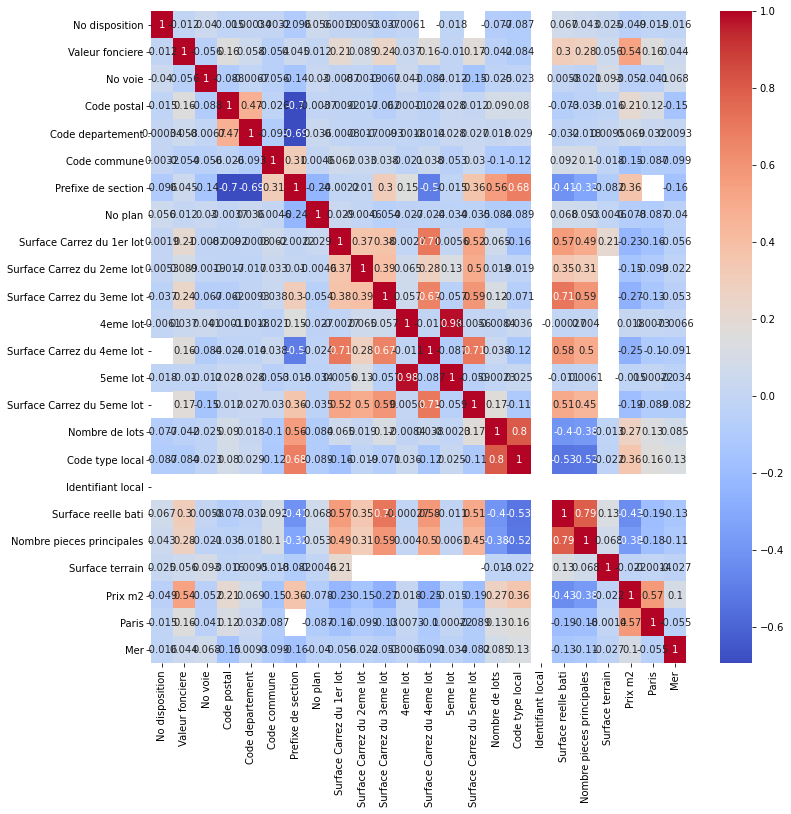

In [34]:
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(cor,annot= True,ax=ax, cmap="coolwarm");

La surface réelle du biens, le nombre de pièces, ainsi que les surfaces Carrez des différents lots semblent corrélées avec la valeur foncière. 

### 6 - Visualisation de la base des équipements

Import de la base

In [ ]:
df = pd.read_csv("bpe19_ensemble_xy.csv", sep =";")

Identification des lignes avec LAMBERT = Nan

In [ ]:
df["nul"]=df["LAMBERT_X"].isna()

Uniquement les valeurs Lambert nulles

In [ ]:
nul = df[df["nul"]==True]

Compatge des équipements avec des coordonnées nulles

In [ ]:
nul["TYPEQU"].value_counts()

On va transformer en int les numéros de départements. Je choisis de supprimer les infos correspondant à 2A et 2B qui correspond à la Corse

In [ ]:
 df=df[-((df["DEP"]=="2A")|(df["DEP"]=="2B"))]
df["DEP"]=df["DEP"].astype(int)

Nombre d'équipements par département

In [ ]:
df["DEP"].value_counts()

In [ ]:
depfin = [75, 78, 91, 92, 93, 94, 95, 13, 69, 31, 6, 44, 34, 33, 59, 35]

In [ ]:
df["DEPFIN"] = df["DEP"].apply(lambda row : row in depfin)

In [ ]:
pd.crosstab(df1["DEP"],df1["EQ"])

Représentation des équipements

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="DEP", data = df)

Nombre d'équipement par type d'équipement

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))
sns.countplot(x="TYPEQU", data = df)

Filtre sur certains équipements

In [ ]:
eqfin = ["A101", "A104", "A203", "A504", "B101", "B102", "B201", "B202", "B203", "C101", "C102", "C104", "C105", "C201", "C301", "C302", "C304", "C305", "C501", "C502", "C503", "C504", "C701", "C702","D101", "D102", "D103", "D106", "D107", "D301","D502", "E102", "E107", "E108", "E109", "F109","F121", "F201", "F202", "F303", "G102", "G103", "G104"]

In [ ]:
df["EQFIN"] = df["TYPEQU"].apply(lambda row : row in eqfin)

In [ ]:
df1 = df[df["EQFIN"]==True]

In [ ]:
dic = {"A101" : "Police ou gendarmerie",
       "A104" : "Police ou gendarmerie",
       "A203" : "Banques",
       "A504" : "resto",
       "B101" : "Alimentation",
       "B102" : "Alimentation",
       "B201" : "Alimentation",
       "B202" : "Alimentation",
       "B203" : "Boulangerie",
       "C101" : "Ecole mat et primaire",
       "C102" : "Ecole mat et primaire",
       "C104" : "Ecole mat et primaire",
       "C105" : "Ecole mat et primaire",
       "C201" : "Collège ou lycée",
       "C301" : "Collège ou lycée",
       "C302" : "Collège ou lycée",
       "C303" : "Collège ou lycée",
       "C304" : "Collège ou lycée",
       "C305" : "Collège ou lycée",
       "C501" : "Ecole sup",
       "C502" : "Ecole sup",
       "C503" : "Ecole sup",
       "C504" : "Ecole sup",
       "C701" : "résidence U",
       "C702" : "resto U",
       "D101" : "Etab hospi",
       "D102" : "Etab hospi",
       "D103" : "Etab hospi",
       "D106" : "Etab hospi",
       "D107" : "Etab hospi",
       "D301" : "Pharmacie",
       "D502" : "Crèche",
       "E102" : "Aéroport",
       "E107" : "Gare nationale",
       "E108" : "Gare",
       "E109" : "Gare",
       "F109" : "Parcours sportif/santé",
       "F121" : "Salle multisport",
       "F201" : "Baignade",
       "F202" : "Port plaisance",
       "F303" : "Cinéma",
       "G102" : "Hotels",
       "G103" : "Camping",
       "G104" : "info touristique"       
      }

In [ ]:
df1["EQ"] = df1["TYPEQU"].replace(dic)

Comptage des équipements selectionnés

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(x="EQ", data = df1)

Visualisation de la qualité des localisations

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))
sns.countplot(x="QUALITE_XY", data = df1)

### 6 - Visualisation de la base des revenus

Import de la base

In [ ]:
df = pd.read_csv("BASE_TD_FILO_DISP_IRIS_2018.csv", sep =";")
df

Description des données de la base revenus

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df.iloc[:, 1::], diag_kind = "kde");

In [ ]:
cor = df.corr()
fig,ax = plt.subplots(figsize =(20,20))
sns.heatmap(cor, annot=True, ax=ax, cmap ="coolwarm");

Analyse des distribution des varaiables

In [ ]:
sns.displot(df.DISP_TP6018, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_Q118, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_MED18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_Q318, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_EQ18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D118, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D218, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D318, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D418, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D618, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D718, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D818, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_D918, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_RD18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_S80S2018, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_GI18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PACT18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PTSA18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PCHO18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PBEN18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PPAT18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PPSOC18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PPFAM18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PPMINI18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PPLOGT18, bins=10, kde=True, rug=True, color='red');
sns.displot(df.DISP_PIMPOT18, bins=10, kde=True, rug=True, color='red');